In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [93]:
df=pd.read_csv(r'C:\Users\visha\OneDrive\Scaler Academy\Datasets\churn_logistic.csv')
df.sample(3)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
684,110,0,100.1,233.3,204.4,11.1,3,0,0,90,...,93,19.83,57,9.20,8,3.00,AK,408,396-2335,0
3561,136,0,199.6,211.4,72.4,11.0,3,1,0,89,...,96,17.97,84,3.26,4,2.97,MA,408,367-8168,1
2344,95,0,183.4,281.3,105.2,8.2,1,0,0,98,...,95,23.91,113,4.73,8,2.21,CA,415,341-3270,0


In [94]:
df.Churn.value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [8]:
#make it imbalanced dataset so remove some of the rows
df.drop([4700, 5353, 5201, 4749],axis=0,inplace=True)

In [95]:
#use function since it is time taking
idx = df.index[df["Churn"] == 1]
len(idx)

2850

In [104]:
import random
idx_list = []
for _ in range(5000):
    idx_list.append(random.choice(idx))
len(idx_list)

5000

In [105]:
new_df = df.drop(idx_list, axis=0)
new_df.Churn.value_counts()

0    2850
1     494
Name: Churn, dtype: int64

In [112]:
494/(494+2850) #we have 85% and 15 data

0.14772727272727273

In [107]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = df["Churn"]
X = df[cols]
X.shape

(5700, 5)

In [110]:
# Train, CV, test split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42)

In [123]:
errors = []
# Calculating error for K values between 1 and 50
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    errors.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Mean Error')

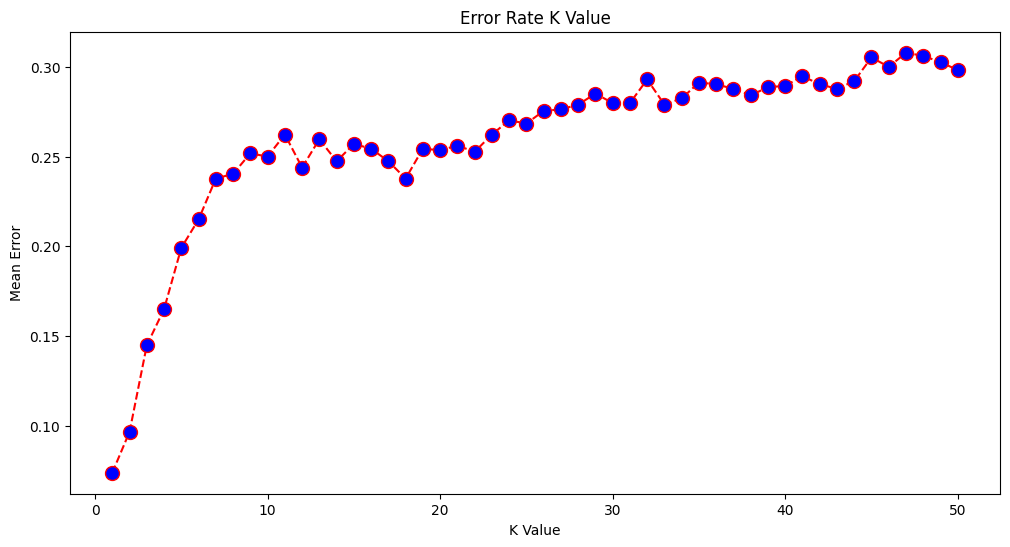

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), errors, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9025487256371814

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(cm , display_labels = knn.classes_ )

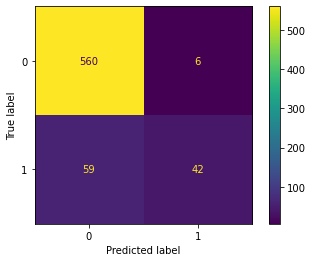

In [ ]:
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       566
           1       0.88      0.42      0.56       101

    accuracy                           0.90       667
   macro avg       0.89      0.70      0.75       667
weighted avg       0.90      0.90      0.89       667



In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
fbeta_score(y_test, y_pred, beta = 0.5)

0.7167235494880546

In [ ]:
fbeta_score(y_test, y_pred, beta = 2)

0.46460176991150437

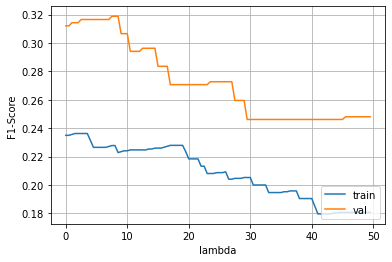

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

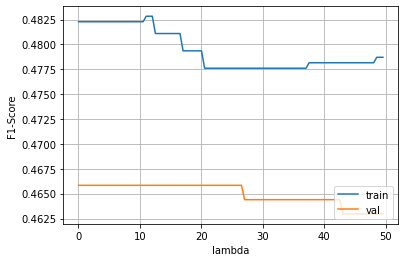

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la,class_weight=({0:1,1:6}) ))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [ ]:
best_idx = np.argmax(val_scores)
print(val_scores[best_idx])

0.46583850931677023


In [ ]:
best_idx

0

In [ ]:
# Model with lambda_best
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:1, 1:6 }))
scaled_lr.fit(X_train, y_train)

y_pred_test = scaled_lr.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)

0.5098039215686274


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85       566
           1       0.38      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.77      0.68       667
weighted avg       0.86      0.78      0.80       667



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [ ]:
smt = SMOTE(sampling_strategy=0.5)
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 1718, 1: 859})


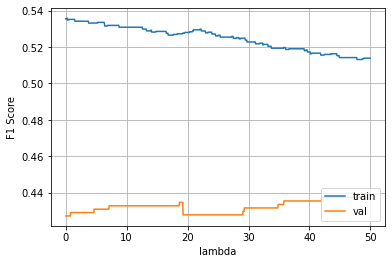

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.05

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_sm, y_sm)
  train_score = f1_score(y_sm, scaled_lr.predict(X_sm))
  val_score = f1_score(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

In [ ]:
# Model with lambda_best
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_sm, y_sm)

y_pred_test = scaled_lr.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)

0.537037037037037


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       566
           1       0.50      0.57      0.54       101

    accuracy                           0.85       667
   macro avg       0.71      0.74      0.72       667
weighted avg       0.86      0.85      0.85       667



In [ ]:
f2 = fbeta_score(y_test,y_pred_test,beta=2)
f0 = fbeta_score(y_test,y_pred_test,beta=0.5)

In [ ]:
print(f2, f0)

0.5587668593448939 0.516934046345811
